## Task 1: 
## Unsupervised Learning with K-means and EM for Dog Breed Data Clustering and EDA

#### Name:  Avinash Bagul
#### ID: 51987820
#### Topic: Assessment 1, Task 1

# K-Means


K-Means Clustering algorithm is an unsupervised machine learning algorithm. In K-Means algorithm the given data is split into the k number of clusters by initially choosing k number of centroids at random, where centroid is a data point aimed to be in the center of each cluster. Randomly selected centroids are used to train kNN classifier which results into set of clusters. The main motive is to reduce the sum of distances between data points and centroids, The process of centroid adjustment is repeated until the values for centroid are stabilized.

<center><img align="center" width="400" height="400" src="kmean.png"></center>

Here, J is objective function, n represents total number of cases, k represents number of clusters. Distance function is calculated for every case, between the data point xi and the centroid cj. So, the centroids are the selected points which represent center of each cluster.

K-Means algorithm is simply based on the pairwise Euclidian distances between the data points, as the sum of squared deviation of each data point from centroid is equal with the sum of squared Euclidian distances divided by number of data points. After choosing centroid at random, in assignment step each data point is picked up and checked for the nearest cluster center. Now, the data point is assigned to the centroid with minimum distance from the data point using Euclidian distance.

In update step the, centroids are recalculated by taking the mean of data points in the cluster and then again repeating the assignment step to allot data points to cluster using new obtained cluster centers. This is repeated until the optimum values for centroids are obtained.

Both, K-Mean and Expectation Maximization are clustering algorithms. Expected Maximization algorithm (EM) is a method to find the maximum likelihood of parameters in statistical model. 
The difference between this algorithm is the method used for calculating the distance between data points. K-Means algorithm use Euclidian distance to calculate the distance between two data items while Expectation maximization uses statistical method to calculate the distance. It needs more computational power and it is difficult to optimized compared to K-Means.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
import seaborn as sns
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import itertools
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

### Read File

Reading file using pandas read_csv function

In [2]:
mydata = pd.read_csv("t1.csv")

## Description of Dataset
The Given Dog Breed Dataset contains data for 300 dogs detailing their properties like; height, tail length, leg length and nose circumference. No missing data was found in the dataset. After  checking for the outliers, total 2 outliers were found in the ‘tail length’ of the dataset using Z score method. All the features in the dataset are numeric (float datatype). The dataset is in .csv format and it is being read using pandas library’s read_csv method.

### Exploratory Data Analysis

In [3]:
mydata.head()

,height,tail length,leg length,nose circumference
0,5.151,3.535,1.414,0.202
1,4.949,3.030,1.414,0.202
2,4.747,3.232,1.313,0.202
3,4.646,3.131,1.515,0.202
4,5.050,3.636,1.414,0.202


In [4]:
mydata.shape

(300, 4)

In [62]:
mydata.isnull().sum()

height                0
tail length           0
leg length            0
nose circumference    0
dtype: int64

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   height              300 non-null    float64
 1   tail length         300 non-null    float64
 2   leg length          300 non-null    float64
 3   nose circumference  300 non-null    float64
dtypes: float64(4)
memory usage: 9.5 KB


In [6]:
mydata.describe()

,height,tail length,leg length,nose circumference
count,300.000000,300.000000,300.00000,300.000000
mean,5.930983,3.103193,3.81437,1.217323
std,0.839601,0.441935,1.78890,0.772409
min,4.343000,2.020000,1.01000,0.101000
25%,5.202000,2.828000,1.61600,0.305250
50%,5.858000,3.060000,4.41500,1.326000
75%,6.528000,3.366000,5.20200,1.836000
max,8.058000,4.488000,7.03800,2.550000


### Feature Correlations

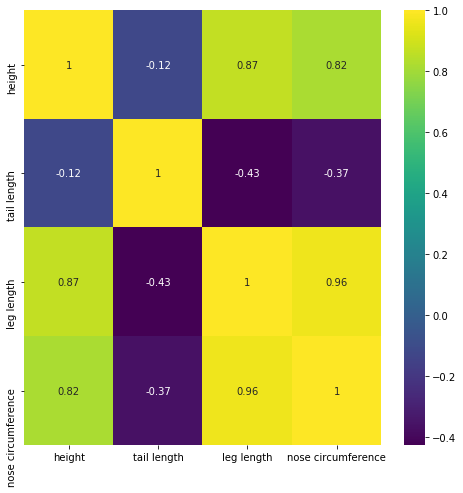

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(mydata.corr(),annot=True, cmap='viridis' )

### Feature Distributions

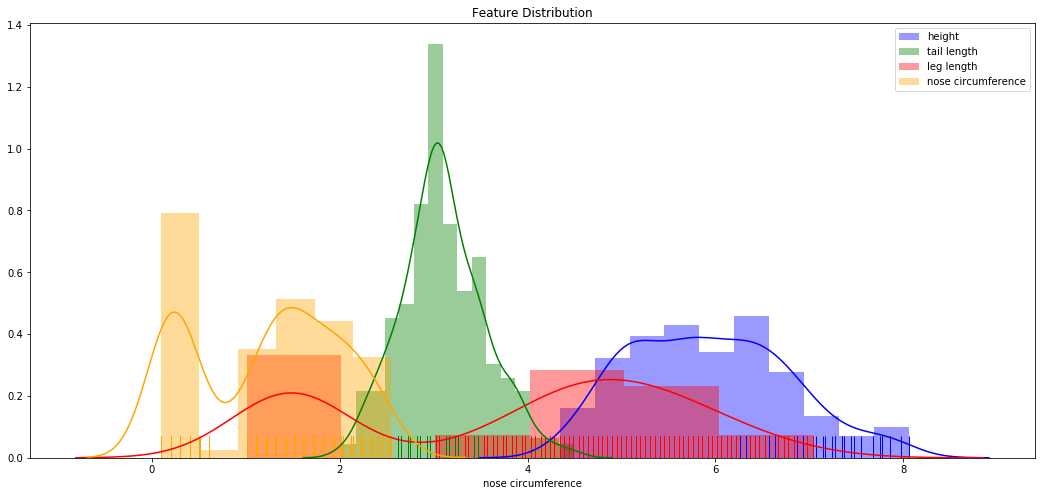

In [49]:
plt.figure(figsize=(18,8))
sns.distplot(mydata["height"],color="b",rug=True, label="height")
sns.distplot(mydata["tail length"],color="g",rug=True, label="tail length")
sns.distplot(mydata["leg length"],color="r",rug=True, label="leg length")
sns.distplot(mydata["nose circumference"],color="orange",rug=True, label="nose circumference")
plt.legend()
plt.title("Feature Distribution")
plt.show()

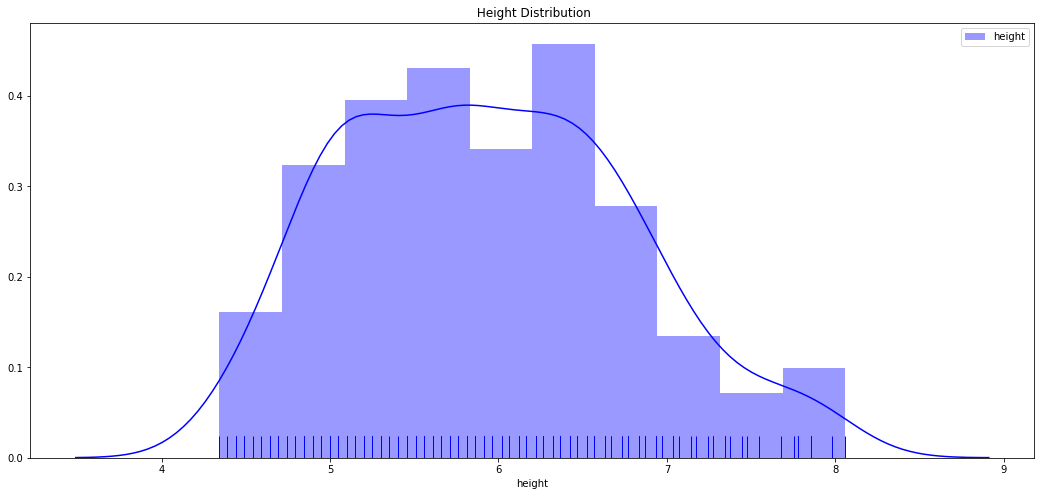

In [33]:
plt.figure(figsize=(18,8))
sns.distplot(mydata["height"],color="b",rug=True, label="height")
plt.legend()
plt.title(" Height Distribution")
plt.show()

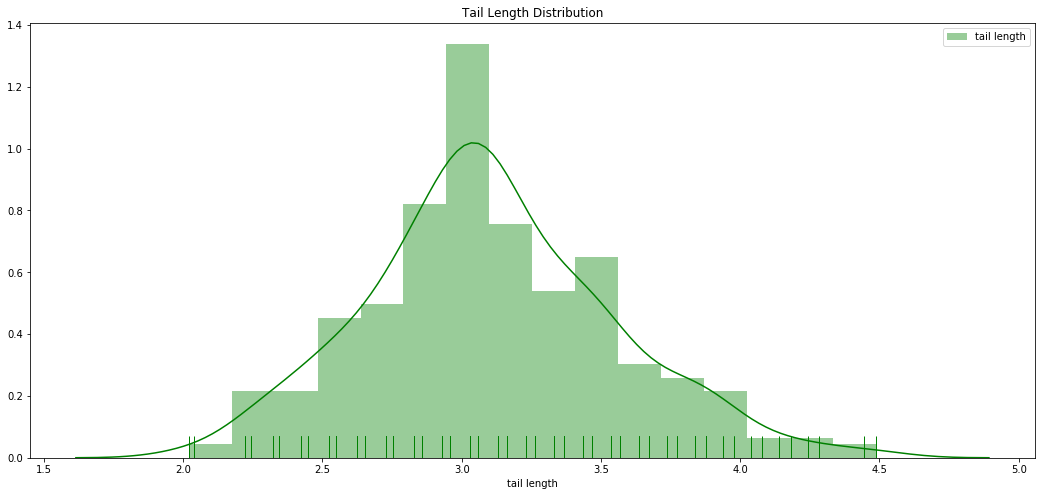

In [34]:
plt.figure(figsize=(18,8))
sns.distplot(mydata["tail length"],color="g",rug=True, label="tail length")
plt.legend()
plt.title("Tail Length Distribution")
plt.show()

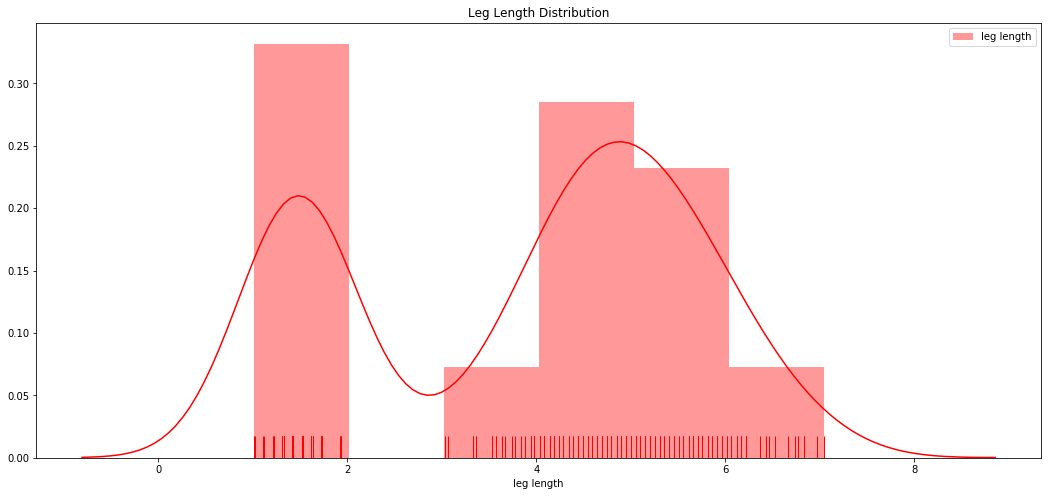

In [35]:
plt.figure(figsize=(18,8))
sns.distplot(mydata["leg length"],color="r",rug=True, label="leg length")
plt.legend()
plt.title("Leg Length Distribution")
plt.show()

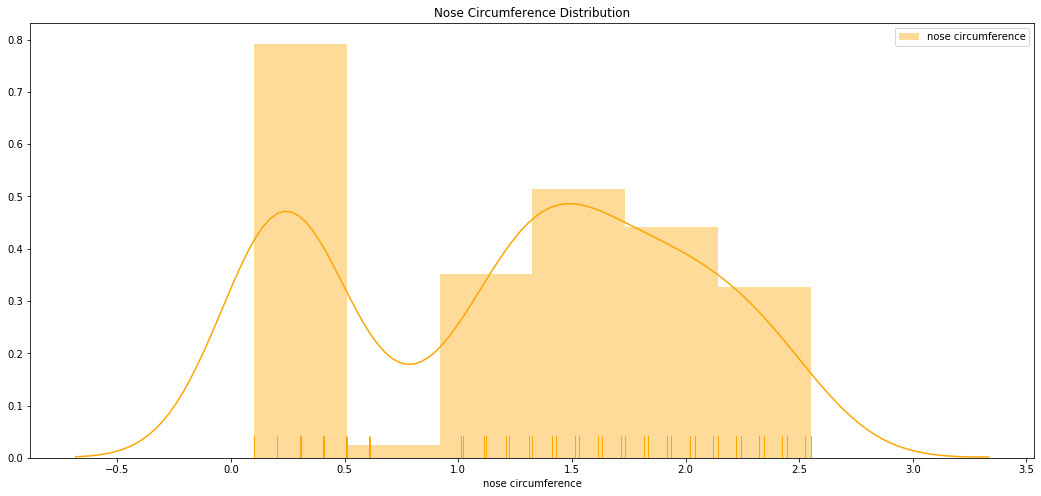

In [36]:
plt.figure(figsize=(18,8))
sns.distplot(mydata["nose circumference"],color="orange",rug=True, label="nose circumference")
plt.legend()
plt.title("Nose Circumference Distribution")
plt.show()

### Pair Plot 

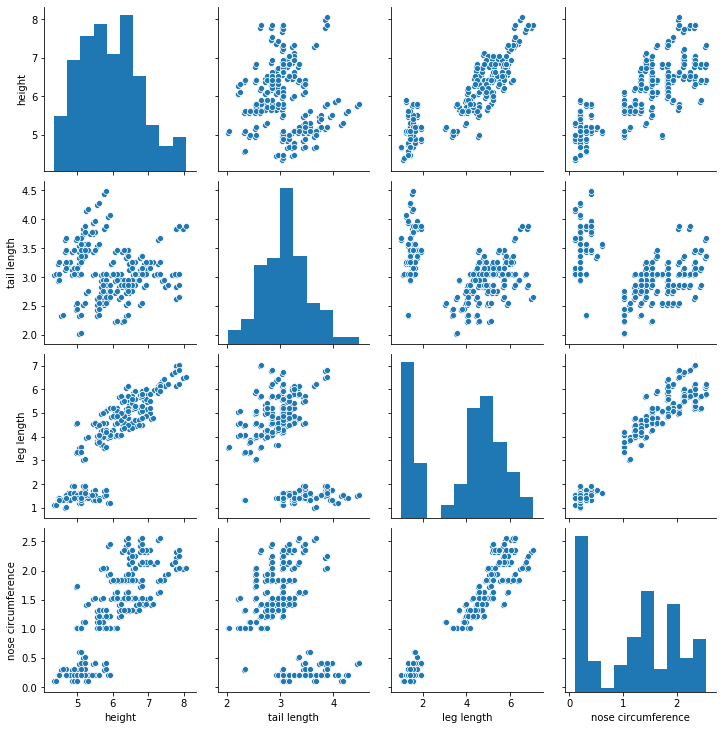

In [50]:
sns.pairplot(mydata)

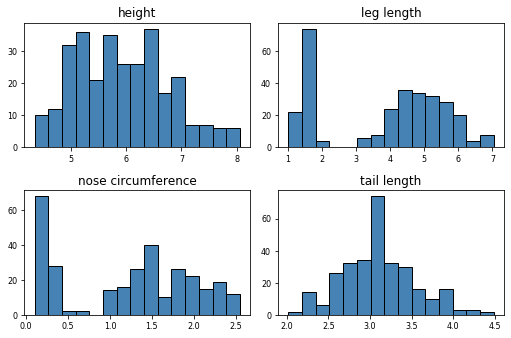

In [56]:
mydata.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

#### Checking for Outliers

In [11]:
def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return len(outliers)

datahead = ['height','tail length','leg length','nose circumference']

for i in range(0,4):
    outlier_datapoints = detect_outlier(mydata[datahead[i]])
    print("Number of Outliers in",datahead[i], " are " , outlier_datapoints)


Number of Outliers in height  are  0
Number of Outliers in tail length  are  2
Number of Outliers in leg length  are  0
Number of Outliers in nose circumference  are  0


#### Visualization of outliers using box plot and scatter plot

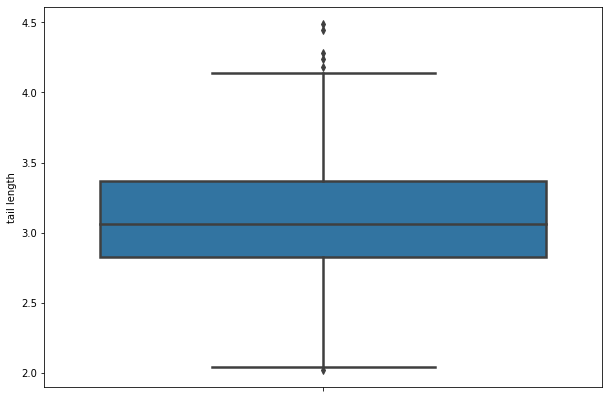

In [12]:
plt.figure(figsize=(10,7))
sns.boxplot(x = mydata["tail length"], linewidth=2.5,orient="v")

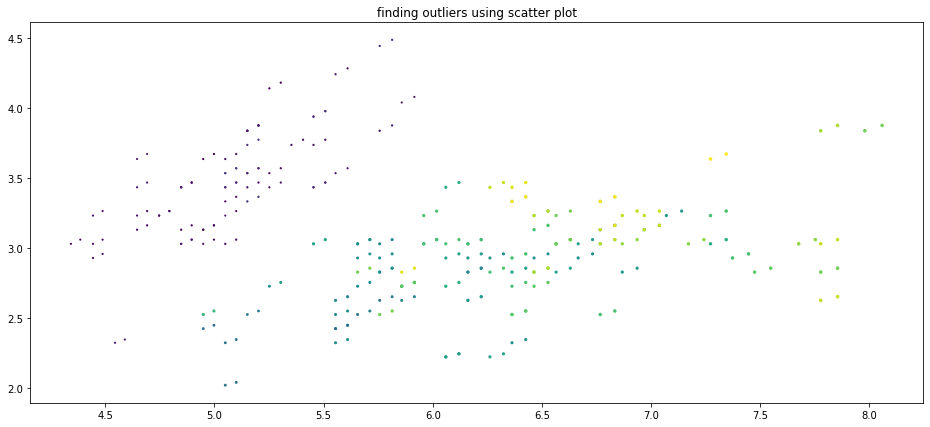

In [13]:

plt.subplots(figsize=(16,7))
plt.scatter(mydata['height'], mydata['tail length'],mydata['leg length'],mydata['nose circumference'])
plt.title("Scatter plot")
plt.show()

## K-Means

#### K = 3

In [207]:
# K-Means method for clustering (Unsupervised Learning)
k=3 # K number of clusters
kmean1 = KMeans(n_clusters = k, init='k-means++',n_init=10,verbose=0, random_state=42, algorithm='elkan')
data = mydata.iloc[:,[0,1,2,3]].values
kmean1.fit(data)
print("number of iterations", kmean1.n_iter_)
print(kmean1)

number of iterations 12
KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)


In [203]:
kmean1

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [204]:
clusters = kmean1.cluster_centers_
print(clusters)

[[5.08109    3.47942    1.48393    0.24969   ]
 [6.95518182 3.12166234 5.81480519 2.09336364]
 [5.98078862 2.7857561  4.45673171 1.45560163]]


In [205]:
km = kmean1.fit_predict(data)

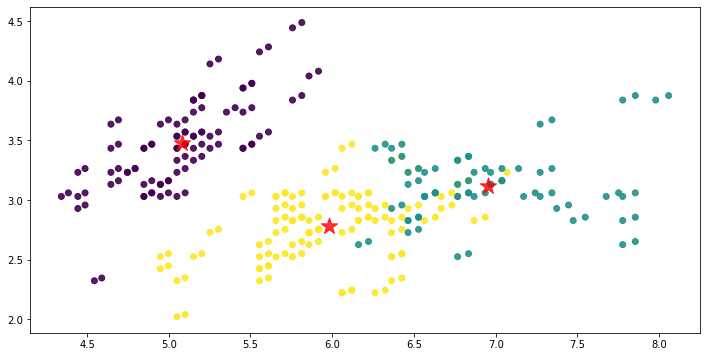

In [206]:
plt.figure(figsize=(12,6))
plt.scatter(data[:,0],data[:,1],c=km,alpha=0.9, cmap='viridis')

# plot the centroids
plt.scatter(kmean1.cluster_centers_[:, 0], kmean1.cluster_centers_[:, 1], s=300, marker='*', c='red',alpha=0.8)

#### K = 4

In [188]:
k=4 # K number of clusters
kmean2 = KMeans(n_clusters = k)
kmean2.fit(data)
print("number of iterations", kmean2.n_iter_)

number of iterations 8


In [189]:
clusters1 = kmean2.cluster_centers_
print(clusters1)

[[5.61336364 2.66825455 4.00976364 1.24185455]
 [5.08109    3.47942    1.48393    0.24969   ]
 [7.03562903 3.15025806 5.94519355 2.17435484]
 [6.34026506 2.90296386 4.90095181 1.652     ]]


In [190]:
KM = kmean2.fit_predict(data)

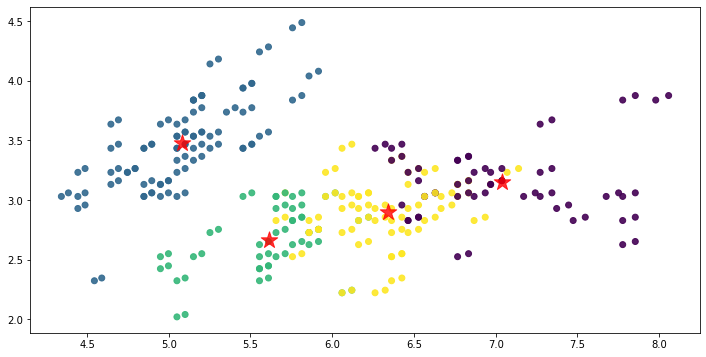

In [191]:
plt.figure(figsize=(12,6))
plt.scatter(data[:,0],data[:,1],c=KM,alpha=0.9, cmap='viridis')

# plot the centroids
plt.scatter(kmean2.cluster_centers_[:, 0], kmean2.cluster_centers_[:, 1], s=300, marker='*', c='red',alpha=0.8)

#### finding optimal number of clusters

In [213]:
sum_of_squared_distances = []
iterations = []
for k in range(1,15):
    kmn = KMeans(n_clusters=k,random_state=41)
    kmn = kmn.fit(data)
    sum_of_squared_distances.append(kmn.inertia_)
    iterations.append(kmn.n_iter_)

#### Elbow method

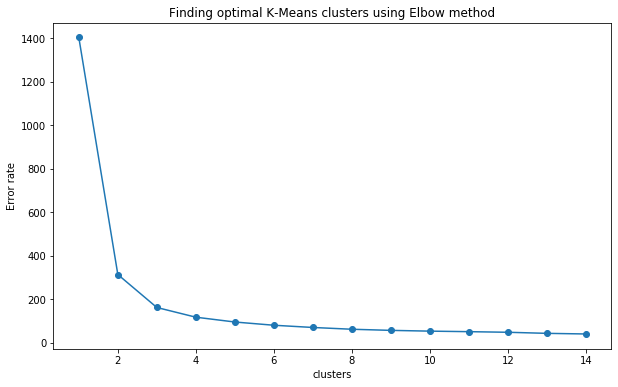

In [214]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 15), sum_of_squared_distances,'o-')
plt.title('Finding optimal K-Means clusters using Elbow method')
plt.xlabel('clusters')
plt.ylabel('Error rate')
plt.show()

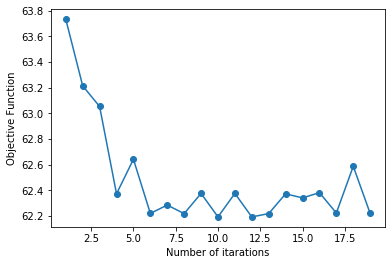

In [227]:
Er =[]
iter=kmean1.n_iter_
for i in range(1,20 ):
    kmeans = KMeans(max_iter = i).fit(data)
    Er.append(kmeans.inertia_)
plt.plot(range(1, 20), Er,'o-')
plt.xlabel('Number of itarations')
plt.ylabel('Objective Function')
plt.show()

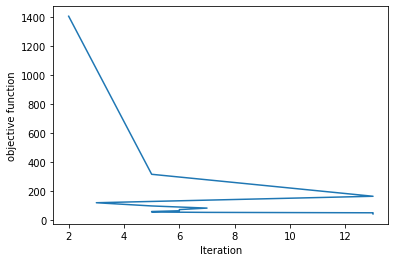

In [215]:

plt.plot(iterations,sum_of_squared_distances)
plt.xlabel('Iteration')
plt.ylabel('objective function')
plt.show()

### Expectation Maximization (EM)

#### n_components = 3

In [24]:
data_scaler = preprocessing.StandardScaler()
data_scaler.fit(data)
scaled_data = data_scaler.transform(data)

sdata = pd.DataFrame(scaled_data, columns = mydata.columns)
dt = sdata.iloc[:,[0,1,2,3]].values

In [219]:
n=3
gm = GaussianMixture(n_components=n,init_params='kmeans',random_state=32)
print(gm)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=32, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)


In [ ]:
gmm = gm.fit_predict(dt)

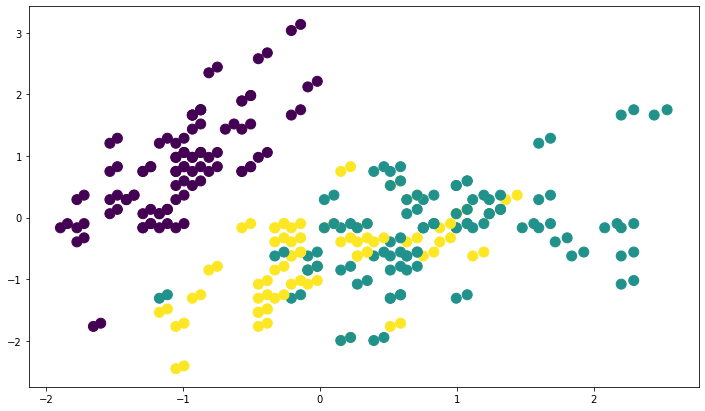

In [26]:
plt.figure(figsize=(12,7))
plt.scatter(dt[:, 0], dt[:, 1], c=gmm, s=100, cmap='viridis');

#### n_components = 4

In [27]:
gm = GaussianMixture(n_components=4)
gmm = gm.fit_predict(dt)

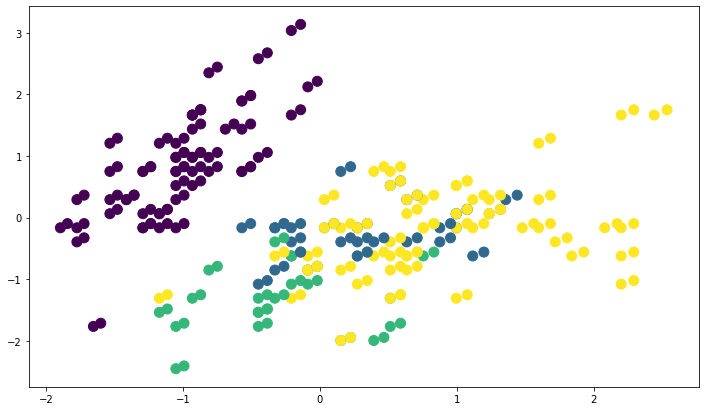

In [28]:
plt.figure(figsize=(12,7))
plt.scatter(dt[:, 0], dt[:, 1], c=gmm, s=100, cmap='viridis');

#### finding optimal n_components

In [216]:
sum_of_squared_distances2 = []
iteration2 = []
for k in range(1,11):
    em = GaussianMixture(n_components = k, random_state=38)
    em = em.fit(dt)
    sum_of_squared_distances2.append(em.bic(dt))
    iteration2.append(em.n_iter_)

#### Elbow method

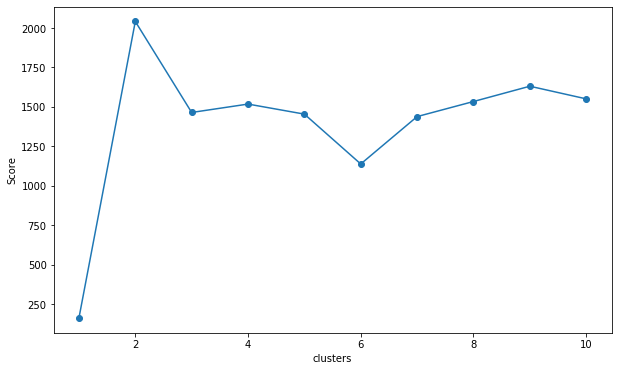

In [217]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), sum_of_squared_distances1,'o-')
plt.xlabel('clusters')
plt.ylabel('Score')
plt.show()

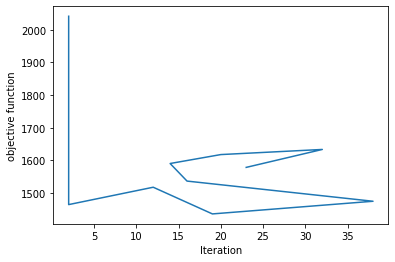

In [218]:
plt.plot(iteration2,sum_of_squared_distances2)
plt.xlabel('Iteration')
plt.ylabel('objective function')
plt.show()